In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt

In [17]:
df = pd.read_excel(r'C:\Users\Aditi\Downloads\ANZ synthesised transaction dataset.xlsx')

In [18]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [19]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [20]:
df.shape

(12043, 23)

In [21]:
df.customer_id.nunique()

100

In [22]:
print('No. of rows in dataset: ', len(df))
print('No. of unique transaction ids: ', df.transaction_id.nunique())

No. of rows in dataset:  12043
No. of unique transaction ids:  12043


In [23]:
df.date.describe()

C:\Users\Aditi\AppData\Local\Temp\ipykernel_14320\1371252037.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.date.describe()


count                   12043
unique                     91
top       2018-09-28 00:00:00
freq                      174
first     2018-08-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [26]:
# missing values

missing_val = df.isnull().sum()
missing_val = missing_val[missing_val>0]

miss_perct = round(missing_val/len(df),2)*100

pd.DataFrame({'No. of missing values': missing_val, 'Percentage': miss_perct}).sort_values(by='Percentage', ascending=False)

,No. of missing values,Percentage
bpay_biller_code,11158,93.0
merchant_code,11160,93.0
card_present_flag,4326,36.0
merchant_id,4326,36.0
merchant_suburb,4326,36.0
merchant_state,4326,36.0
merchant_long_lat,4326,36.0


In [27]:
# descriptive statistics of numerical variables
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [30]:
#EDA

df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [33]:
df.card_present_flag.value_counts(dropna = False)

# here nan value means that the transaction has occurred when neither the cardholder nor the card is physically present at the time of transaction

1.0    6194
NaN    4326
0.0    1523
Name: card_present_flag, dtype: int64

In [34]:
df.currency.value_counts(dropna=False)

AUD    12043
Name: currency, dtype: int64

In [35]:
df.long_lat.value_counts(dropna=False)

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

In [36]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

E:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='txn_description', ylabel='count'>

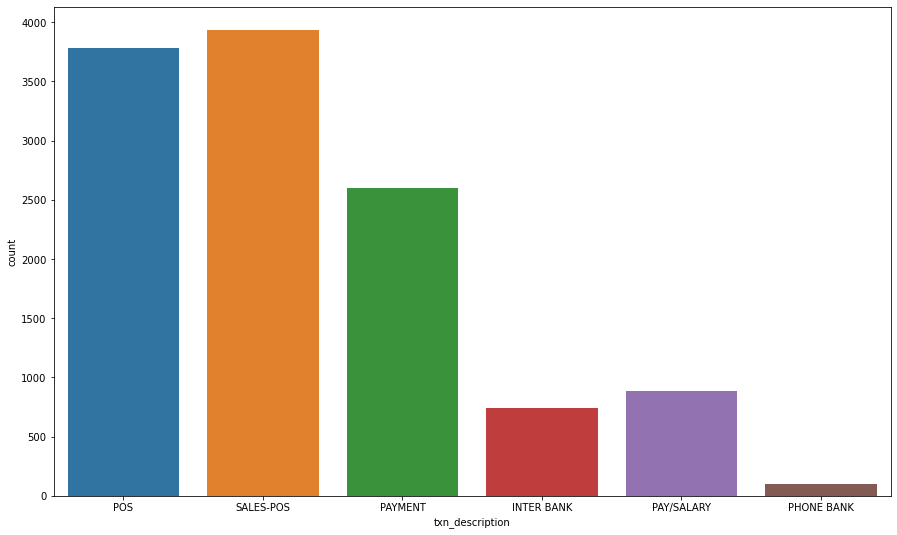

In [39]:
plt.figure(figsize=(15,9))
sns.countplot(df.txn_description)

In [44]:
df.groupby('txn_description', as_index=False)['amount'].mean().sort_values(by='amount', ascending =False)

,txn_description,amount
1,PAY/SALARY,1898.728029
3,PHONE BANK,106.099010
0,INTER BANK,86.699461
2,PAYMENT,77.613077
4,POS,40.407412
5,SALES-POS,39.909789


In [ ]:
# pay/salary has the largest average transation volume

In [45]:
df.gender.value_counts(dropna=False)

M    6285
F    5758
Name: gender, dtype: int64

E:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

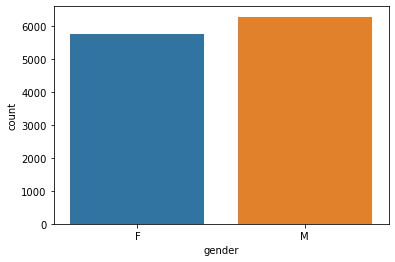

In [46]:
sns.countplot(df.gender)

Text(0.5, 1.0, 'Average transaction volume by gender')

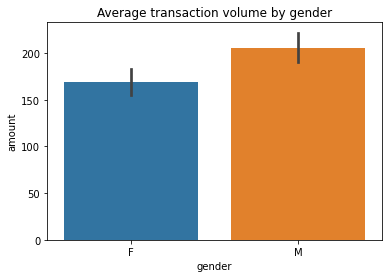

In [47]:
sns.barplot(x='gender', y='amount', data=df)
plt.title('Average transaction volume by gender')

In [48]:
df.merchant_suburb.value_counts(dropna=False)

NaN                  4326
Melbourne             255
Sydney                233
Southport              82
Brisbane City          79
                     ... 
Cowell                  1
Tweed Heads South       1
Ballandean              1
Sydenham                1
Kings Park              1
Name: merchant_suburb, Length: 1610, dtype: int64

In [49]:
df.merchant_state.value_counts(dropna=False)

NaN    4326
NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

E:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of transactions by state')

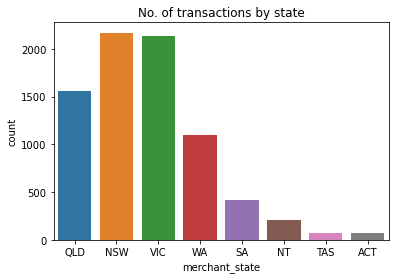

In [50]:
sns.countplot(df.merchant_state)
plt.title('No. of transactions by state')

In [51]:
df.groupby('merchant_state', as_index=False)['amount'].mean().sort_values(by='amount', ascending =False)

,merchant_state,amount
0,ACT,66.803836
1,NSW,47.036316
2,NT,44.726293
6,VIC,41.099953
4,SA,40.425470
3,QLD,34.372397
7,WA,30.901873
5,TAS,28.866618


Text(0.5, 1.0, 'Average transaction volume by state')

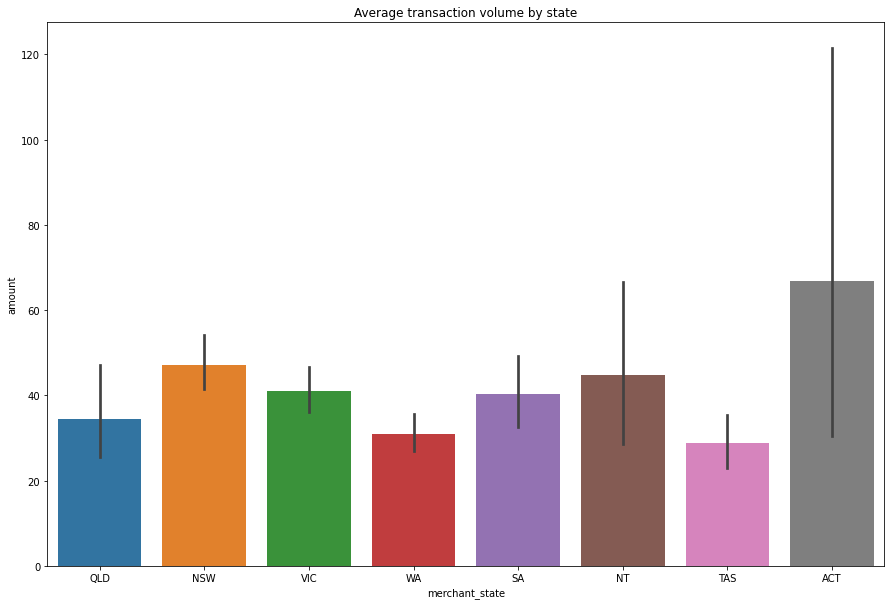

In [54]:
plt.figure(figsize=(15,10))
sns.barplot(x='merchant_state', y='amount', data=df)
plt.title('Average transaction volume by state')

In [55]:
df.extraction.head()

0    2018-08-01T01:01:15.000+0000
1    2018-08-01T01:13:45.000+0000
2    2018-08-01T01:26:15.000+0000
3    2018-08-01T01:38:45.000+0000
4    2018-08-01T01:51:15.000+0000
Name: extraction, dtype: object

In [56]:
df[['date', 'extraction']]

,date,extraction
0,2018-08-01,2018-08-01T01:01:15.000+0000
1,2018-08-01,2018-08-01T01:13:45.000+0000
2,2018-08-01,2018-08-01T01:26:15.000+0000
3,2018-08-01,2018-08-01T01:38:45.000+0000
4,2018-08-01,2018-08-01T01:51:15.000+0000
...,...,...
12038,2018-10-31,2018-10-31T23:09:06.000+0000
12039,2018-10-31,2018-10-31T23:21:46.000+0000
12040,2018-10-31,2018-10-31T23:34:25.000+0000
12041,2018-10-31,2018-10-31T23:47:05.000+0000


In [57]:
# since we already have a date column, we could extract the time component from the extration column

In [58]:
df.merchant_long_lat.head()

0    153.38 -27.99
1    151.21 -33.87
2    151.21 -33.87
3    153.05 -26.68
4    153.44 -28.06
Name: merchant_long_lat, dtype: object

In [59]:
df.movement.value_counts(dropna=False)

debit     11160
credit      883
Name: movement, dtype: int64

E:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No. of transaction by movement')

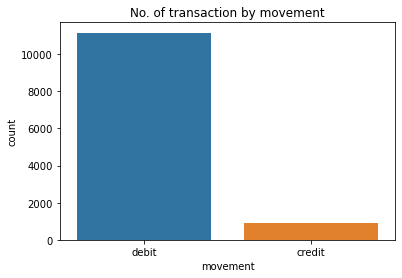

In [60]:
sns.countplot(df.movement)
plt.title('No. of transaction by movement')

Text(0.5, 1.0, 'Average transaction volume by movement')

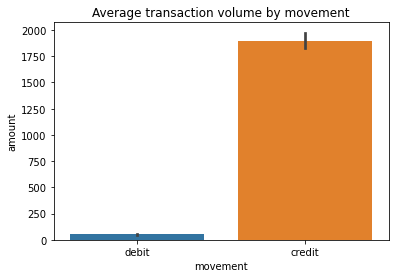

In [61]:
sns.barplot(x='movement', y = 'amount', data=df)
plt.title('Average transaction volume by movement')

In [ ]:
#Numerical values

E:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Balance Distribution')

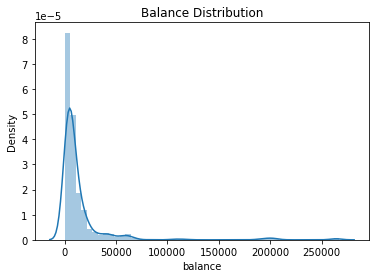

In [62]:
sns.distplot(df.balance)
plt.title('Balance Distribution')

E:\Program Files\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

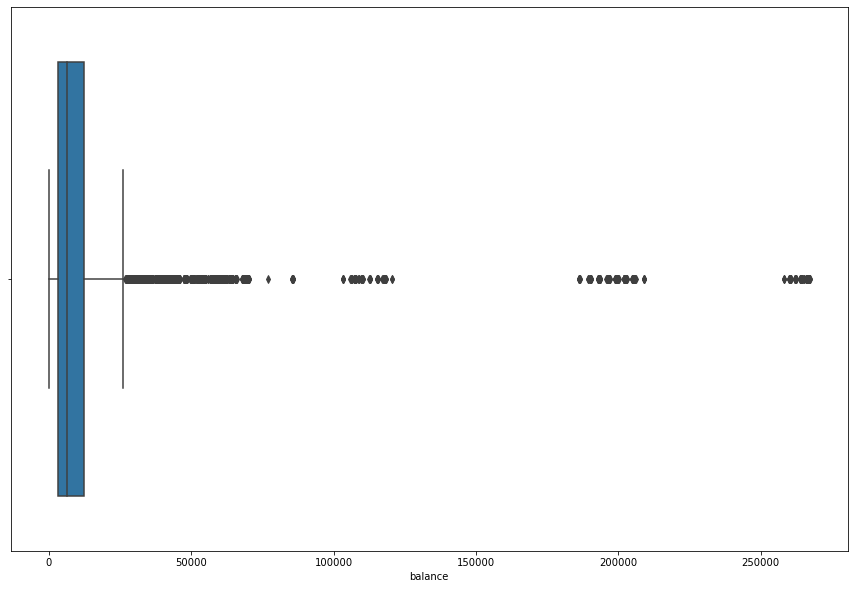

In [65]:
plt.figure(figsize=(15,10))
sns.boxplot(df.balance)

E:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

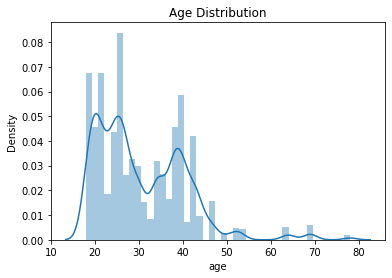

In [66]:
sns.distplot(df.age)
plt.title('Age Distribution')

E:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Amount Distribution')

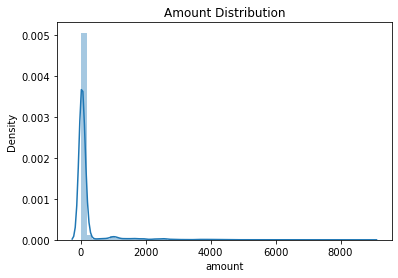

In [67]:
sns.distplot(df.amount)
plt.title('Amount Distribution')

In [68]:
# Feature Engineering

#Droping unwanted columns

In [69]:
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [70]:
df = df.drop(['bpay_biller_code', 'merchant_code'], axis = 1)
df.isna().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [71]:
df.shape

(12043, 21)

In [72]:
pd.DataFrame({'No. of missing values': missing_val, 'Percentage': miss_perct}).sort_values(by='Percentage', ascending=False)

,No. of missing values,Percentage
bpay_biller_code,11158,93.0
merchant_code,11160,93.0
card_present_flag,4326,36.0
merchant_id,4326,36.0
merchant_suburb,4326,36.0
merchant_state,4326,36.0
merchant_long_lat,4326,36.0


In [73]:
nonSales = df.loc[(df.txn_description!= 'SALES-POS') | (df.txn_description!= 'POS'), :]
nonSales.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

In [ ]:
# as expected missing values in the following columns all originate from non-purchases transactions

*card_present_flag
*merchant_id
*merchant_suburb
*merchant_state
*merchant_long_lat

# we will proceed to fill these missing values with na 

In [74]:
cols = ['card_present_flag','merchant_id', 'merchant_suburb','merchant_state', 'merchant_long_lat']

for i in cols:
    df[i].fillna('n/a', inplace=True)

In [75]:
df.isna().sum()

status               0
card_present_flag    0
account              0
currency             0
long_lat             0
txn_description      0
merchant_id          0
first_name           0
balance              0
date                 0
gender               0
age                  0
merchant_suburb      0
merchant_state       0
extraction           0
amount               0
transaction_id       0
country              0
customer_id          0
merchant_long_lat    0
movement             0
dtype: int64

In [ ]:
# create features for month, week and hour

In [77]:
daily_amt = pd.DataFrame(df.groupby('date')['amount'].sum())
daily_amt

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50
...,...
2018-10-27,6971.58
2018-10-28,8438.11
2018-10-29,38549.14


Text(0.5, 1.0, 'Transaction amount for the give time')

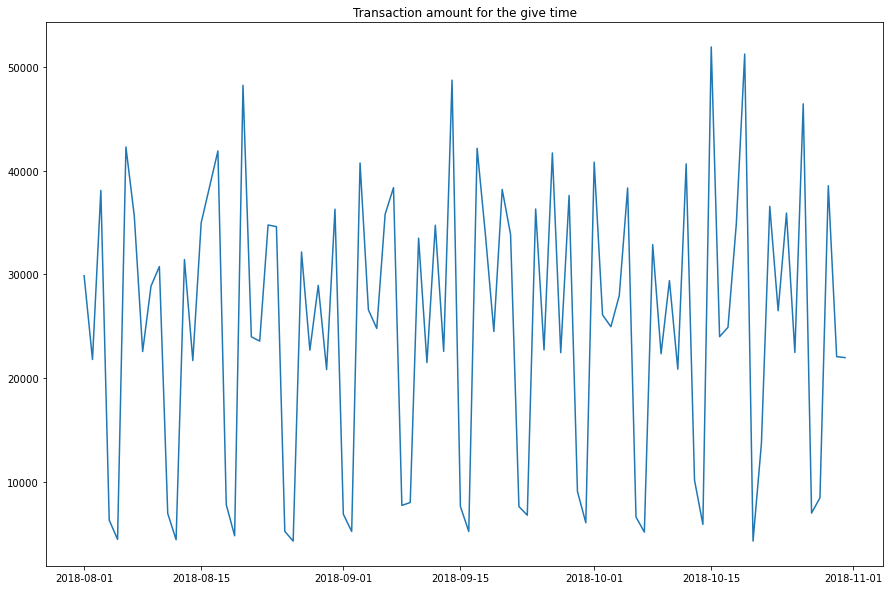

In [80]:
plt.figure(figsize=(15,10))
plt.plot(daily_amt.index, daily_amt.amount)
plt.title('Transaction amount for the give time')

In [82]:
# there appeaers to be a cyclical pattern in transaction volume over the 3 months period. It could be because

#* Salaries are paid out only on certain days of the month/week
#* people tend to spend more during the weekends

# let's create 3 more features to test out the hypothesis

In [83]:
df['month'] = pd.DatetimeIndex(df.date).month
df['dayofweek'] = pd.DatetimeIndex(df.date).dayofweek

In [84]:
df[['date', 'month', 'dayofweek']]

,date,month,dayofweek
0,2018-08-01,8,2
1,2018-08-01,8,2
2,2018-08-01,8,2
3,2018-08-01,8,2
4,2018-08-01,8,2
...,...,...,...
12038,2018-10-31,10,2
12039,2018-10-31,10,2
12040,2018-10-31,10,2
12041,2018-10-31,10,2


In [85]:
df.extraction

0        2018-08-01T01:01:15.000+0000
1        2018-08-01T01:13:45.000+0000
2        2018-08-01T01:26:15.000+0000
3        2018-08-01T01:38:45.000+0000
4        2018-08-01T01:51:15.000+0000
                     ...             
12038    2018-10-31T23:09:06.000+0000
12039    2018-10-31T23:21:46.000+0000
12040    2018-10-31T23:34:25.000+0000
12041    2018-10-31T23:47:05.000+0000
12042    2018-10-31T23:59:44.000+0000
Name: extraction, Length: 12043, dtype: object

In [88]:
df['extraction'] = [i.split("T")[1].split(".")[0] for i in df.extraction]

In [89]:
df.extraction

0        01:01:15
1        01:13:45
2        01:26:15
3        01:38:45
4        01:51:15
           ...   
12038    23:09:06
12039    23:21:46
12040    23:34:25
12041    23:47:05
12042    23:59:44
Name: extraction, Length: 12043, dtype: object

In [90]:
df['hour'] = [i.split(':')[0] for i in df.extraction]

In [91]:
df[['extraction', 'hour']]

,extraction,hour
0,01:01:15,01
1,01:13:45,01
2,01:26:15,01
3,01:38:45,01
4,01:51:15,01
...,...,...
12038,23:09:06,23
12039,23:21:46,23
12040,23:34:25,23
12041,23:47:05,23


In [92]:
# let's dive deep now

In [93]:
df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,month,dayofweek,hour
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,01:01:15,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,8,2,01
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,01:13:45,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,8,2,01
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,01:26:15,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,8,2,01
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,01:38:45,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,8,2,01
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,01:51:15,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,8,2,01


In [97]:
purch_amt = df.loc[(df.txn_description == 'SALES-POS') | (df.txn_description == 'POS'), 'amount']
purch_amt.head()

0    16.25
1    14.19
2     6.42
3    40.90
4     3.25
Name: amount, dtype: float64

E:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Purchase transaction amount')

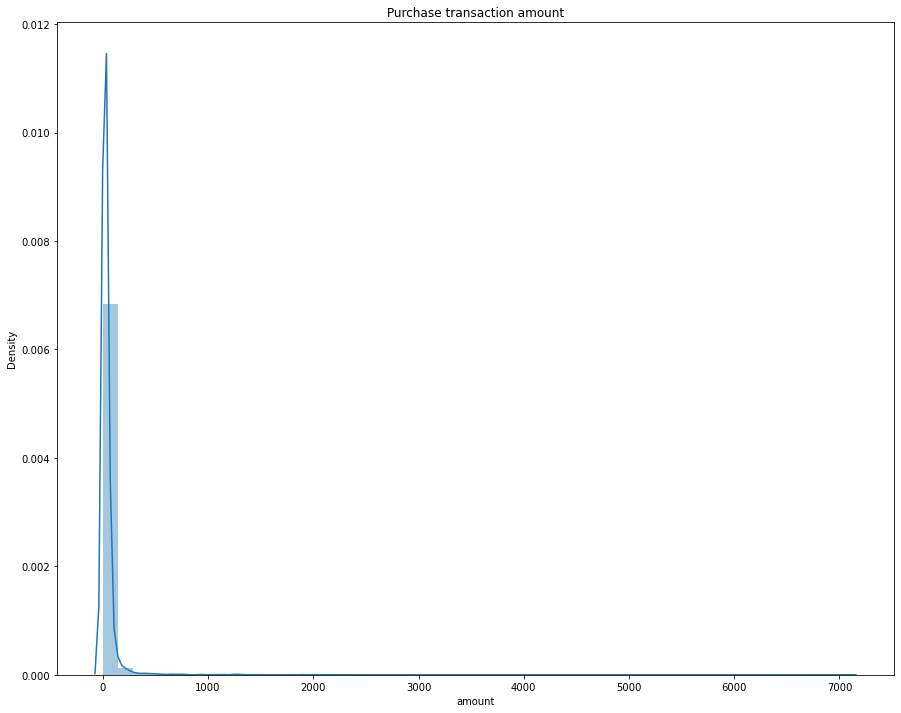

In [99]:
plt.figure(figsize=(15,12))
sns.distplot(purch_amt)
plt.title('Purchase transaction amount')

In [100]:
df.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [101]:
cust_monthly = pd.DataFrame(df.groupby('customer_id')['amount'].sum()/3)
cust_monthly

,amount
customer_id,
CUS-1005756958,5422.990000
CUS-1117979751,11328.123333
CUS-1140341822,5670.200000
CUS-1147642491,9660.273333
CUS-1196156254,12016.906667
...,...
CUS-72755508,3812.790000
CUS-809013380,6270.030000
CUS-860700529,6033.293333


E:\Program Files\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Monthly transaction volume')

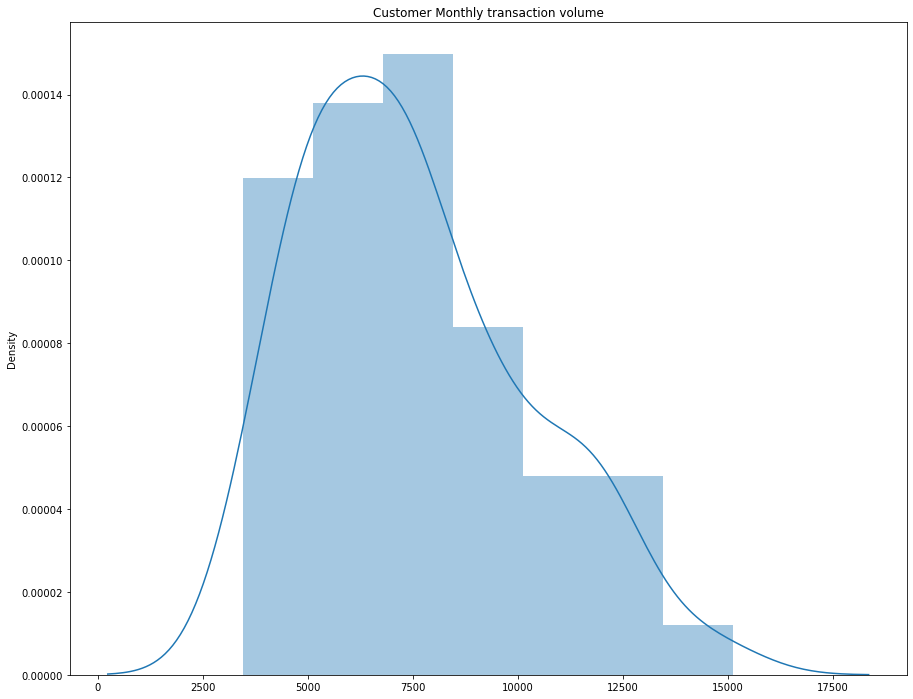

In [102]:
plt.figure(figsize=(15,12))
sns.distplot(cust_monthly)
plt.title('Customer Monthly transaction volume')

Text(0.5, 1.0, 'average transaction amount by month')

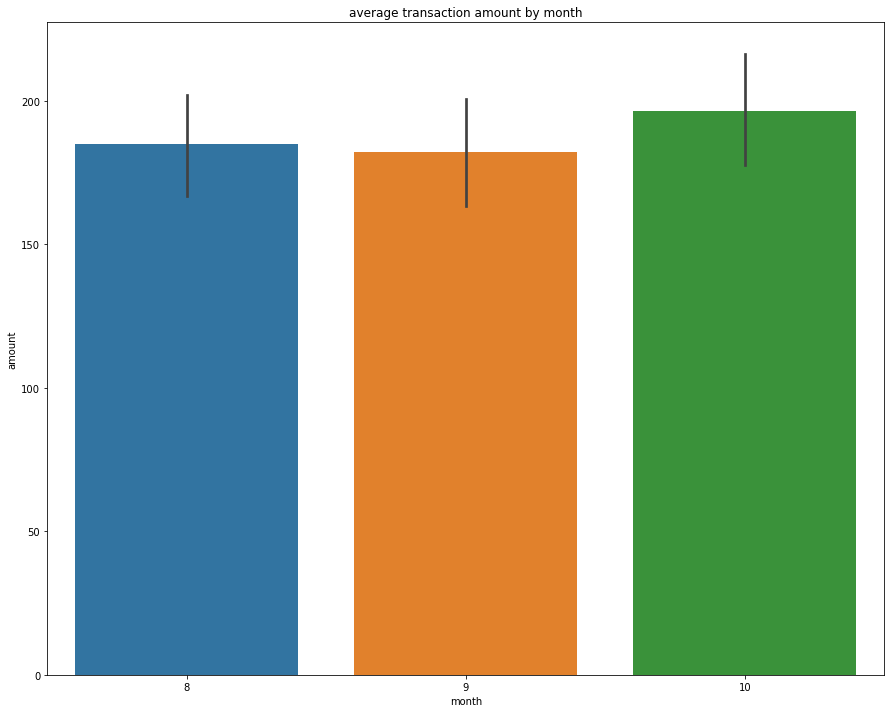

In [104]:
plt.figure(figsize=(15,12))
sns.barplot(x='month', y='amount', data= df)
plt.title('average transaction amount by month')

In [105]:
daily_avg_amt = pd.DataFrame(df.groupby('dayofweek')['amount'].mean())
daily_avg_amt.head()

,amount
dayofweek,
0,373.221000
1,221.576456
2,195.215570
3,184.010422
4,249.353517


Text(0, 0.5, 'Amount')

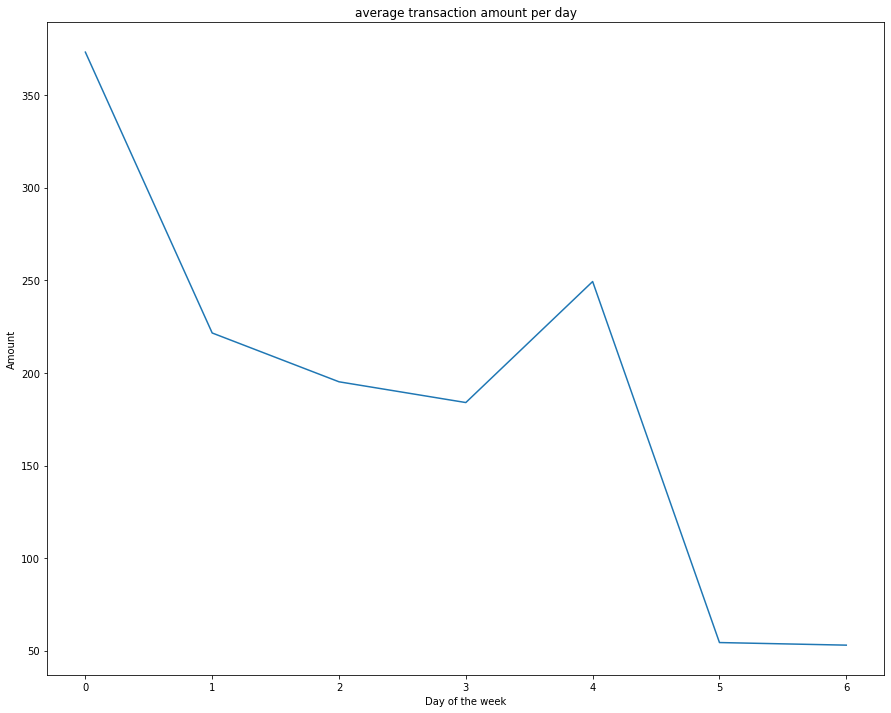

In [108]:
plt.figure(figsize=(15,12))
plt.plot(daily_avg_amt.index, daily_avg_amt.amount)
plt.title('average transaction amount per day')
plt.xlabel('Day of the week')
plt.ylabel('Amount')

In [109]:
# Let's check the distribution of transaction amount for different categories

In [110]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [111]:
df.loc[df.txn_description == 'PAY/SALARY', 'category'] = 'Salary'
df.loc[(df.txn_description == 'SALES-POS')|(df.txn_description == 'POS'), 'category'] = 'Purchase'
df.category.fillna('Others', inplace=True)

df[['txn_description','category']]

,txn_description,category
0,POS,Purchase
1,SALES-POS,Purchase
2,POS,Purchase
3,SALES-POS,Purchase
4,SALES-POS,Purchase
...,...,...
12038,POS,Purchase
12039,SALES-POS,Purchase
12040,POS,Purchase
12041,SALES-POS,Purchase


In [113]:
day_cat_amt = pd.DataFrame(df.groupby(['dayofweek', 'category'])['amount'].count())
day_cat_amt

amount
dayofweek category        
0         Others       411
          Purchase     742
          Salary       207
1         Others       486
          Purchase     841
          Salary       160
2         Others       640
          Purchase    1251
          Salary       172
3         Others       555
          Purchase    1103
          Salary       143
4         Others       555
          Purchase    1317
          Salary       201
5         Others       372
          Purchase    1337
6         Others       424
          Purchase    1126

Text(0.5, 1.0, 'No. of transactions each day by category')

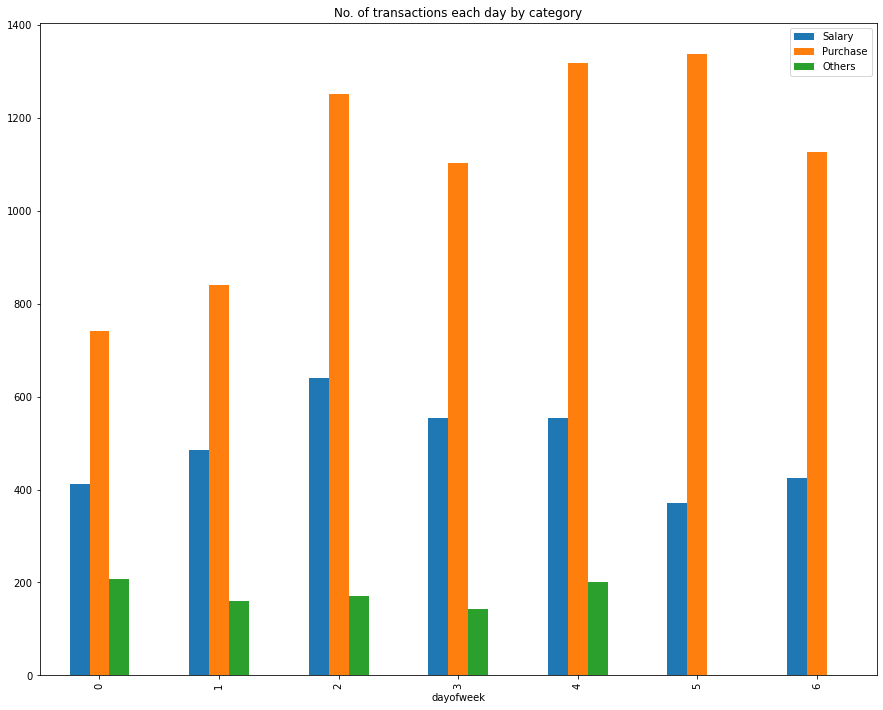

In [118]:
day_cat_amt.unstack().plot(kind='bar', stacked=False, figsize=(15,12))
plt.legend(['Salary', 'Purchase', 'Others'])
plt.title('No. of transactions each day by category')

In [119]:
avg_hour_vol = pd.DataFrame(df.groupby(['hour'])['amount'].mean())
avg_hour_vol

,amount
hour,
00,28.274907
01,48.716402
02,75.269764
03,84.725918
04,61.301845
05,64.524641
06,59.205261
07,72.927256
08,43.749159


Text(0.5, 1.0, 'Average Transaction Volume per hour')

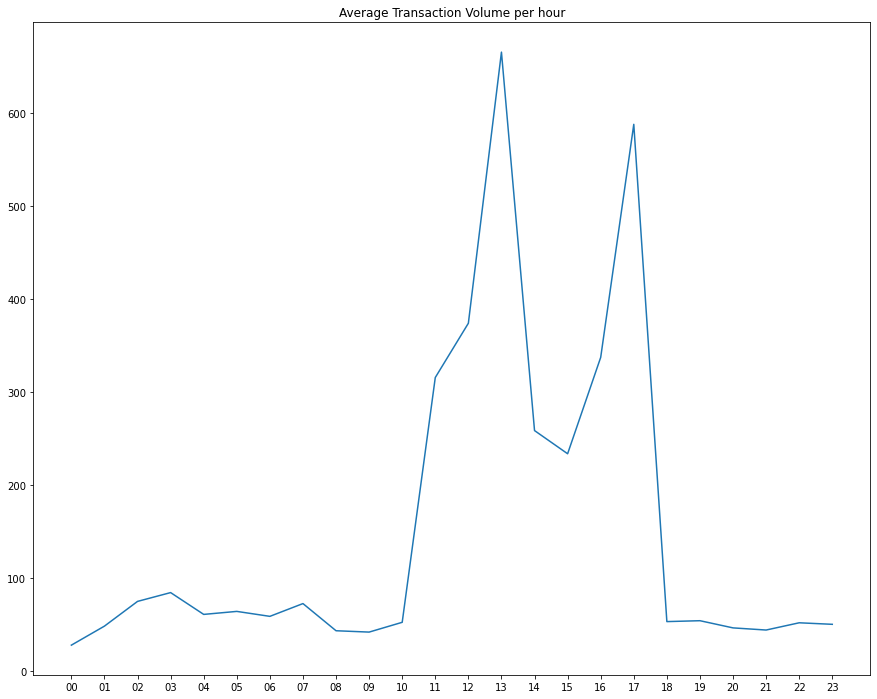

In [121]:
plt.figure(figsize=(15,12))
plt.plot(avg_hour_vol.index, avg_hour_vol.amount)
plt.title('Average Transaction Volume per hour')

In [122]:
hr_cat_amt = pd.DataFrame(df.groupby(['hour', 'category'])['amount'].count())
hr_cat_amt

amount
hour category        
00   Purchase     108
01   Purchase     214
02   Others       117
     Purchase      95
03   Others       153
     Purchase      43
04   Others       149
     Purchase     160
05   Others       180
     Purchase      29
06   Others       191
     Purchase      58
07   Others       161
     Purchase     105
08   Others       131
     Purchase     416
09   Others       128
     Purchase     978
10   Others       140
     Purchase     475
11   Others       231
     Purchase     606
     Salary       104
12   Others       148
     Purchase     278
     Salary       117
13   Others        88
     Purchase     274
     Salary       196
14   Others       160
     Purchase     497
     Salary       100
15   Others       118
     Purchase     558
     Salary        52
16   Others       135
     Purchase     289
     Salary        92
17   Others       195
     Purchase     398
     Salary       222
18   Others       182
     Purchase     201
19   Others       159
     Purchase     389
20   Others       221
     Purchase     377
21   Others       158
     Purchase     583
22   Others       127
     Purchase     331
23   Others       171
     Purchase     255

Text(0.5, 1.0, 'No. of transactions each hour by category')

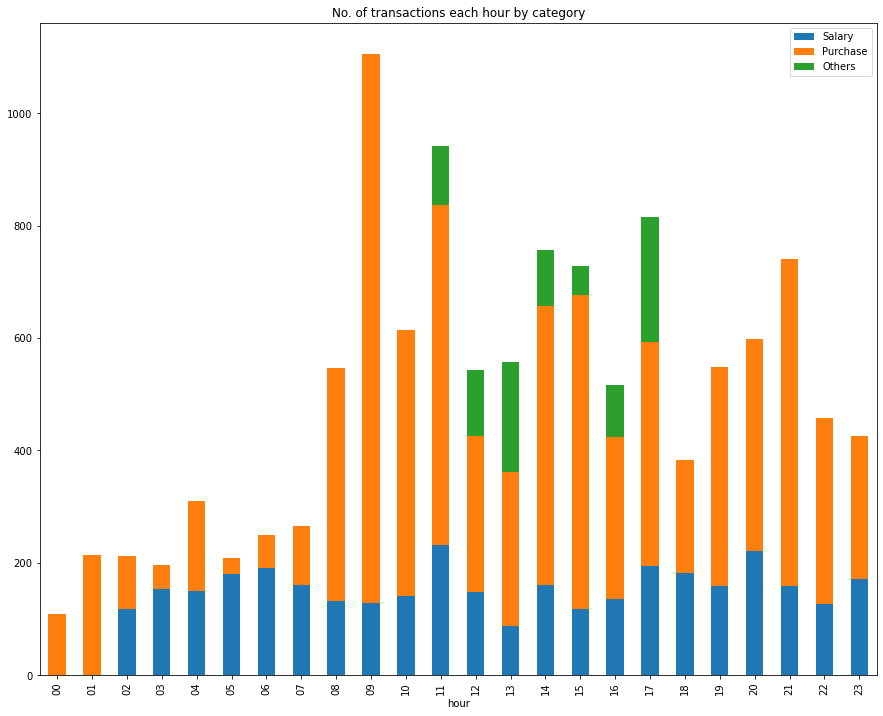

In [126]:
hr_cat_amt.unstack().plot(kind='bar', stacked=True, figsize=(15,12))
plt.legend(['Salary', 'Purchase', 'Others'])
plt.title('No. of transactions each hour by category')

In [127]:
# Saving the dataset

In [124]:
df.to_pickle(r'C:\Users\Aditi\Downloads\Data_ANZ.pk1')